# BIRCH without adaptive thresholding

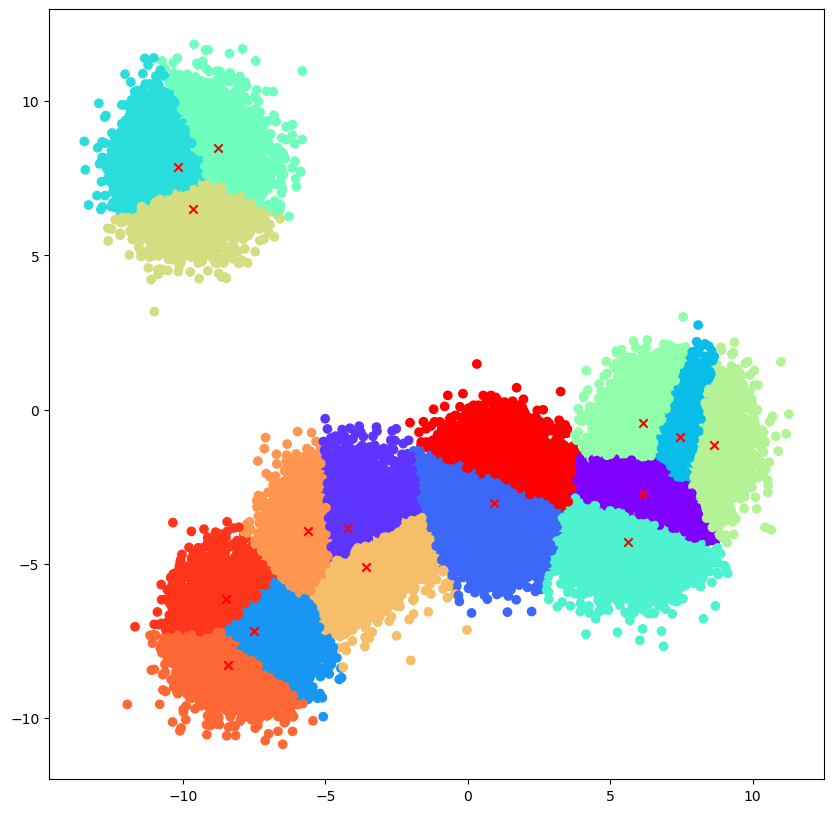

In [10]:
from sklearn.datasets import make_blobs
from Custom_BIRCH import BIRCH
import matplotlib.pyplot as plt
import numpy as np

dataset, blob_clusters = make_blobs(n_samples = 100000, n_features=2, centers=6, random_state = 48)

branching_factor = 50
threshold = 2

birch = BIRCH(branching_factor=branching_factor, threshold=threshold)
birch.fit(dataset)

clusters = birch.get_clusters()
labels = birch.predict(dataset)

custom_birch_centroids = [np.mean(np.array(cf.data_points), axis=0) for cf in clusters]
custom_birch_centroids = np.array(custom_birch_centroids)

plt.figure(figsize=(10, 10))
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='rainbow')
plt.scatter(custom_birch_centroids[:, 0], custom_birch_centroids[:, 1], c='red', marker='x') 
plt.show()



# BIRCH with adaptive thresholding

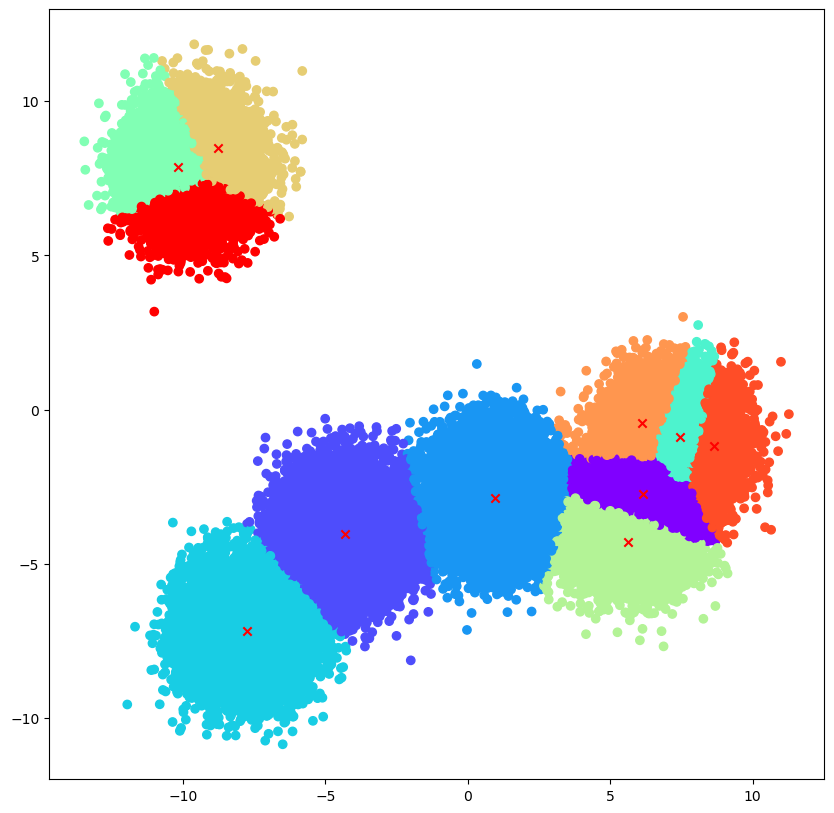

In [11]:
max_memory = 0.5 #MB

birch = BIRCH(branching_factor=branching_factor, threshold=threshold, max_memory_limit=max_memory)
birch.fit(dataset)

clusters = birch.get_clusters()
labels = birch.predict(dataset)

custom_birch_centroids = [np.mean(np.array(cf.data_points), axis=0) for cf in clusters]
custom_birch_centroids = np.array(custom_birch_centroids)

plt.figure(figsize=(10, 10))
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='rainbow')
plt.scatter(custom_birch_centroids[:, 0], custom_birch_centroids[:, 1], c='red', marker='x') 
plt.show()

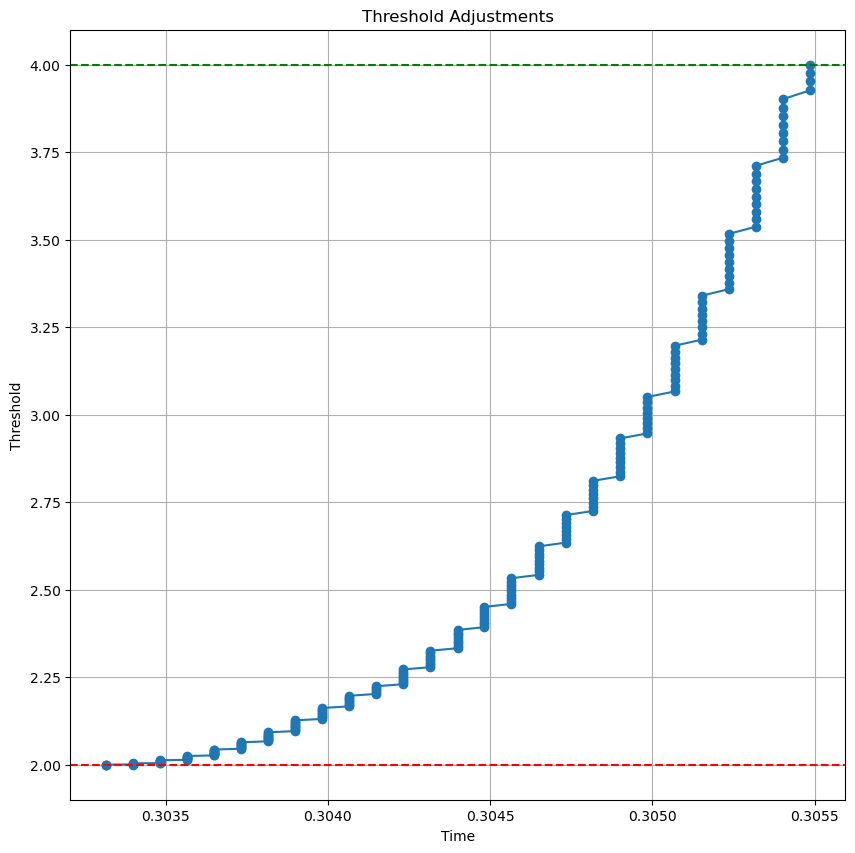

In [13]:
adjustment_times, thresholds = zip(*birch.threshold_adjustments)
relative_times_fraction = [t / birch.total_time for t in adjustment_times]

plt.figure(figsize=(10, 10))
plt.plot(relative_times_fraction, thresholds, marker='o')
plt.axhline(y=birch.initial_threshold, color='r', linestyle='--', label='Initial Threshold')
plt.axhline(y=birch.max_threshold, color='g', linestyle='--', label='Max Threshold')
plt.grid()
plt.title('Threshold Adjustments')
plt.xlabel('Time')
plt.ylabel('Threshold')
plt.show()